In [16]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
%matplotlib notebook
iris_dataset = load_iris()

In [17]:
print("Keys of iris_dataset: \n{}" .format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [18]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [19]:
print("Target names: {}" .format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [20]:
print("Feature names: \n{}" .format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
print("Type of data: {}". format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [22]:
print("Shape of data: {}" .format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [23]:
print("First file columns of data:\n{}" .format(iris_dataset['data'][:5]))

First file columns of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [24]:
print("Type of target: {}" .format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [25]:
print("Shape of target: {}" .format(iris_dataset['target'].shape))

Shape of target: (150,)


In [26]:
print("Target:\n{}" .format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [28]:
print("X_train shape: {}" .format(X_train.shape))
print("y_train shape: {}" .format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [29]:
print("X_test shape: {}" .format(X_test.shape))
print("y_test shape: {}" .format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


/Users/okamurakento/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


<IPython.core.display.Javascript object>


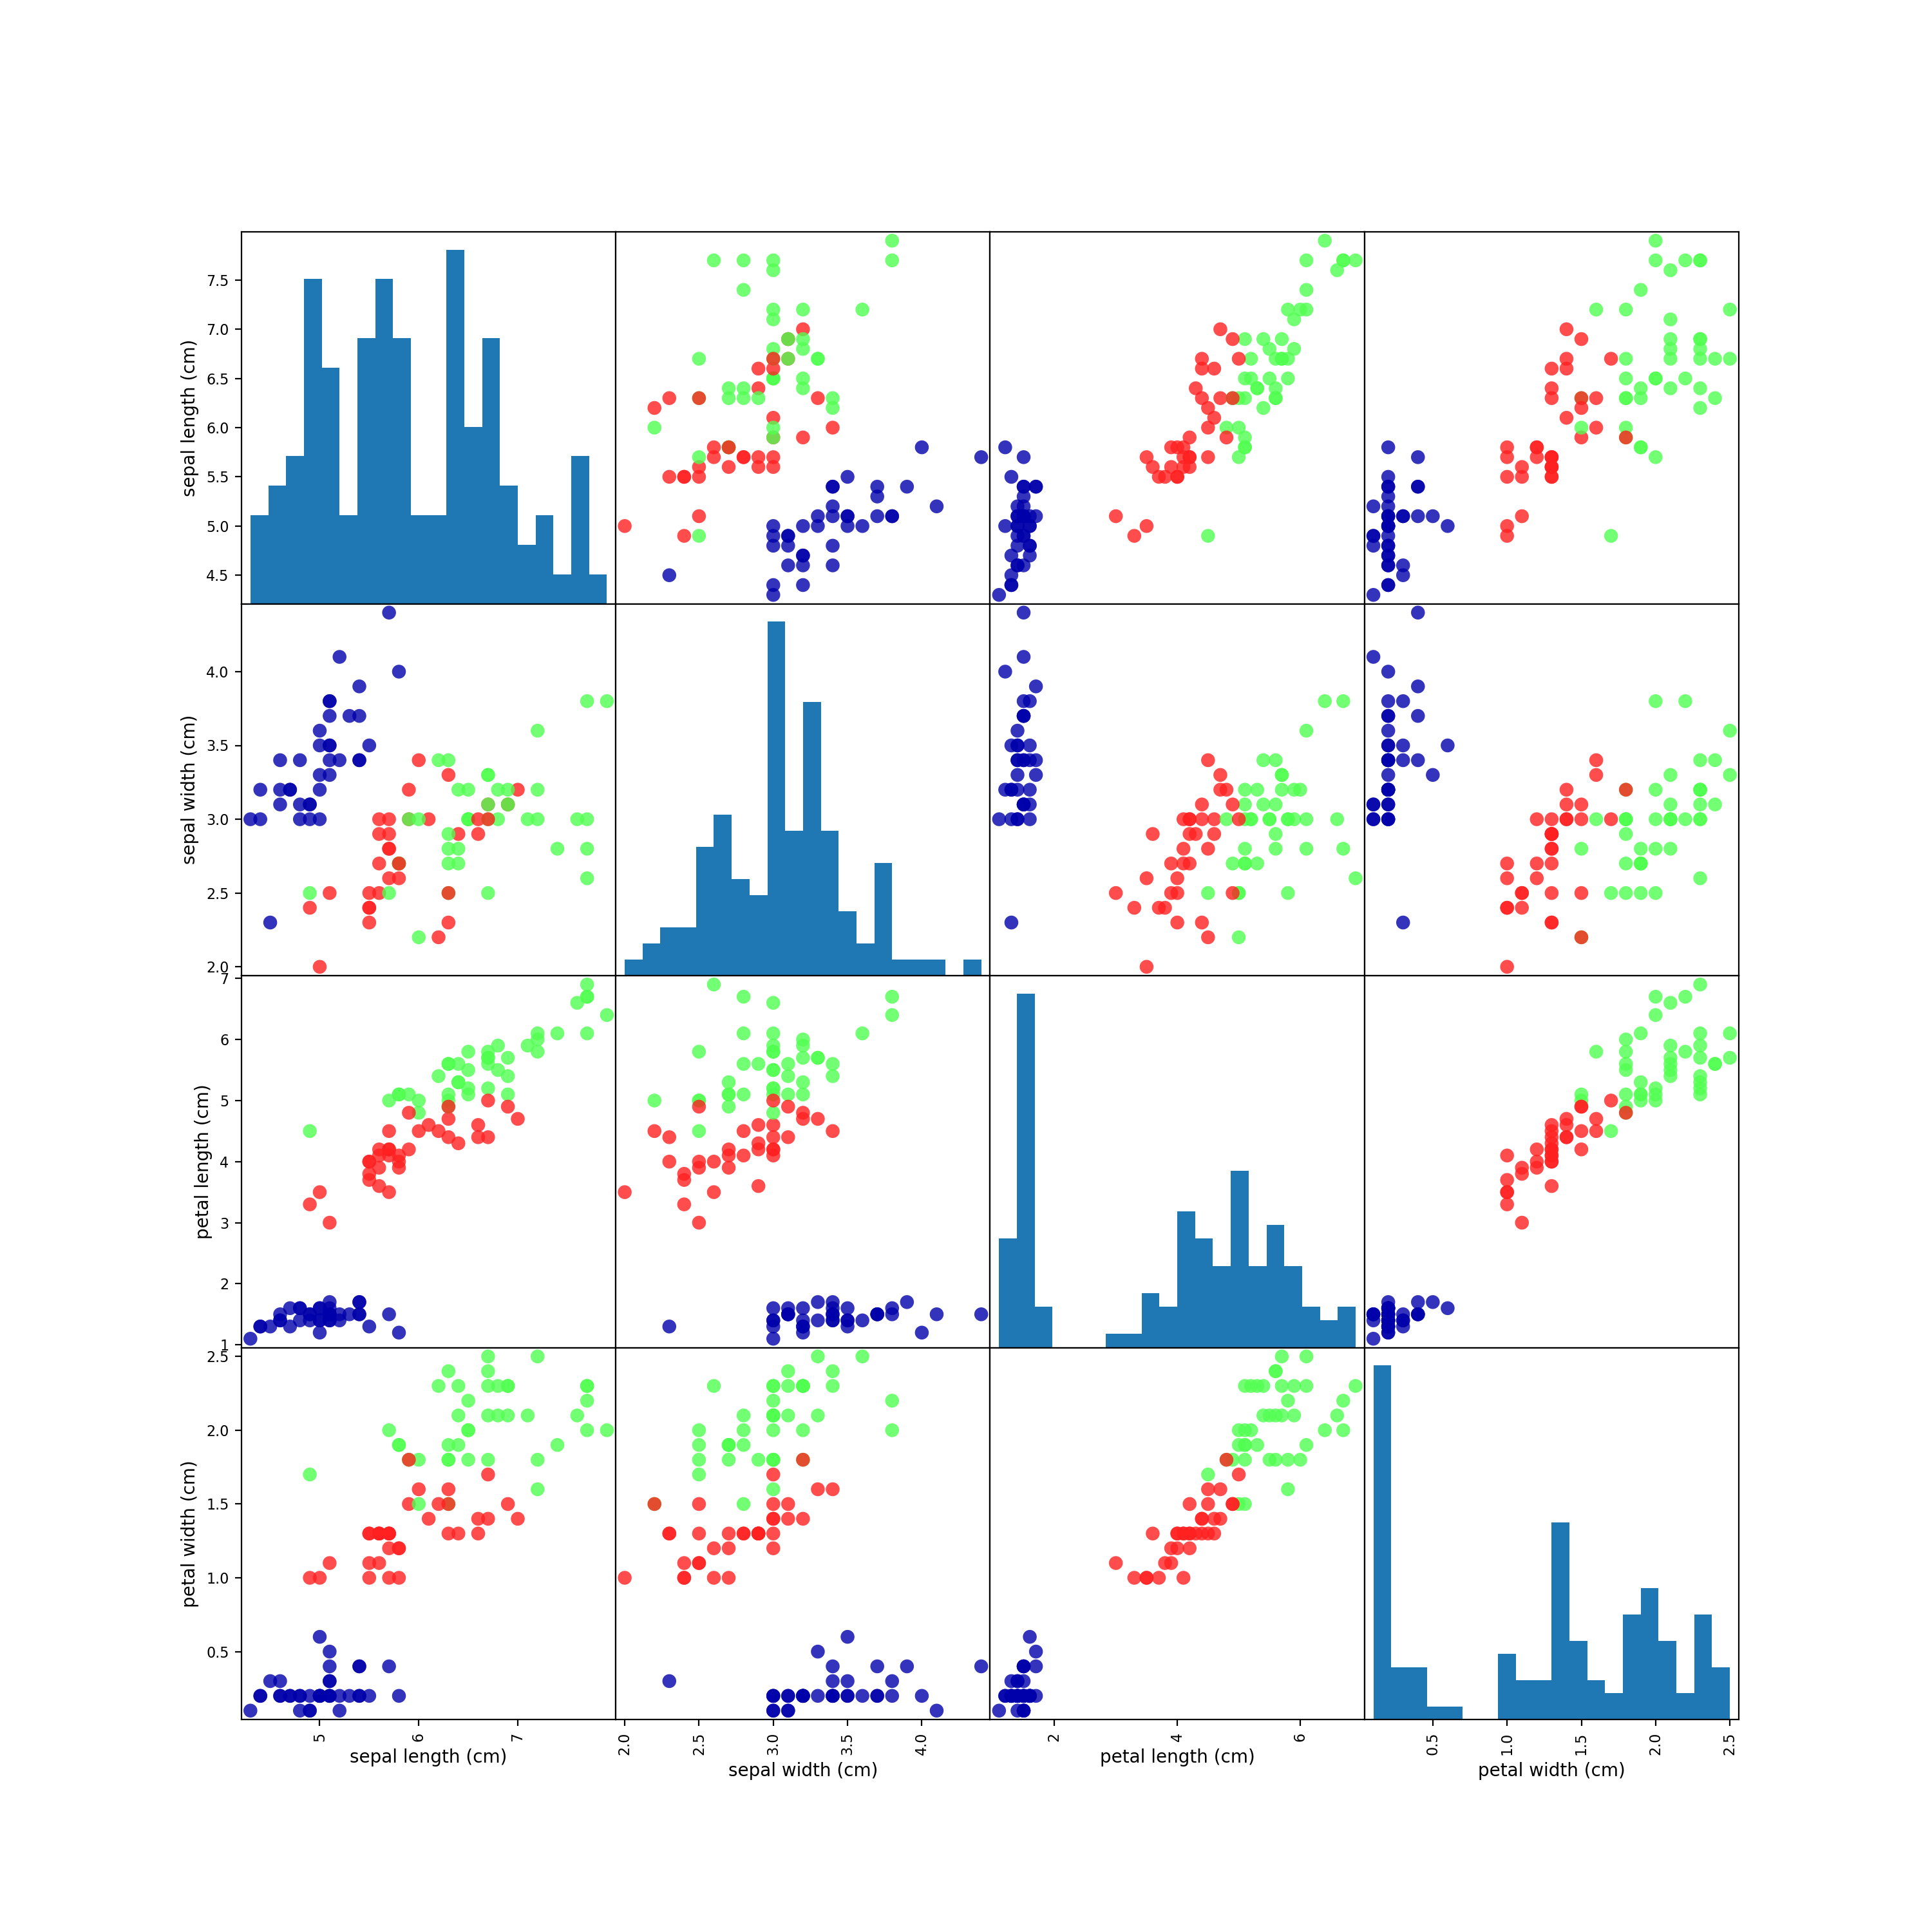

In [30]:
import pandas as pd
# X_trainのデータからDataFrameを作る、
# iris_dataset.feature_namesの文字列を使ってカラムに名前をつける。
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [39]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}" .format(X_new.shape))

X_new.shape: (1, 4)


In [43]:
prediction= knn.predict(X_new)
print("Prediction: {}" .format(prediction))
print("Predicted target name: {}" .format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [44]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}" .format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [45]:
print("Test set score: {:.2f}" .format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [47]:
print("Test set score: {:.2f}" .format(knn.score(X_test, y_test)))

Test set score: 0.97
